## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

    ### riassunto per rifare l'es
2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
# 1
import pandas as pd
import numpy as np
file = 'data_000637.txt'
N=20000
df= pd.read_csv(file)[:N]   # Read a comma-separated values (csv) file into DataFrame. leggo le prime N righe del file
df.head()  #printa le prime righe del DataFrame

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
###  TDC behaves like seconds, BX like minutes and ORBIT like hours

BX_range = df['BX_COUNTER'].max() +1
print('x=', BX_range)

x= 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
                                ### (g)
BX_time= 25
TDC_time= 25/30

TDC_range = df['TDC_MEAS'].max() + 1  #Return the maximum of the values over the requested axis.
n_orbit= df['ORBIT_CNT'].max() - df['ORBIT_CNT'].min()

ORBIT_time= TDC_time * TDC_range * BX_time * BX_range
time_data_taking = ORBIT_time * n_orbit
print ( f"The data timetaking lasted {time_data_taking} ns")

The data timetaking lasted 443272500.0 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
            ###(g)
df["ABS_TIME_ns"] = pd.Series(df['TDC_MEAS']* TDC_time  + df['BX_COUNTER']*BX_time + df['ORBIT_CNT']*ORBIT_time) #One-dimensional ndarray with axis labels (including time series
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME_ns
0,1,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
4,1,0,64,3869200167,2760,25,8.618643e+15


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
# 5 ( g)
df['HEAD']= np.random.randint(2, size= N)
df.head()
#This code uses a list comprehension to generate a list of random choices (either 0 or 1)
#  with a length equal to the number of rows in your DataFrame. 
# It then assigns this list to a new column named 'HEAD' in your DataFrame.
#After running this code, your DataFrame df will have a new column 'HEAD'
#  containing random 0s and 1s for each row.

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME_ns
0,1,0,123,3869200167,2374,26,8.618643e+15
1,0,0,124,3869200167,2374,27,8.618643e+15
2,0,0,63,3869200167,2553,28,8.618643e+15
3,0,0,64,3869200167,2558,19,8.618643e+15
4,0,0,64,3869200167,2760,25,8.618643e+15


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
# 6
new_df= df[df['HEAD']==1]
new_df


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME_ns
0,1,0,123,3869200167,2374,26,8.618643e+15
5,1,0,63,3869200167,2762,4,8.618643e+15
6,1,0,61,3869200167,2772,14,8.618643e+15
7,1,0,139,3869200167,2776,0,8.618643e+15
8,1,0,62,3869200167,2774,21,8.618643e+15
...,...,...,...,...,...,...,...
19977,1,0,38,3869200366,1346,23,8.618644e+15
19981,1,0,40,3869200366,1951,18,8.618644e+15
19984,1,0,59,3869200366,1973,19,8.618644e+15
19986,1,0,60,3869200366,1976,11,8.618644e+15


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

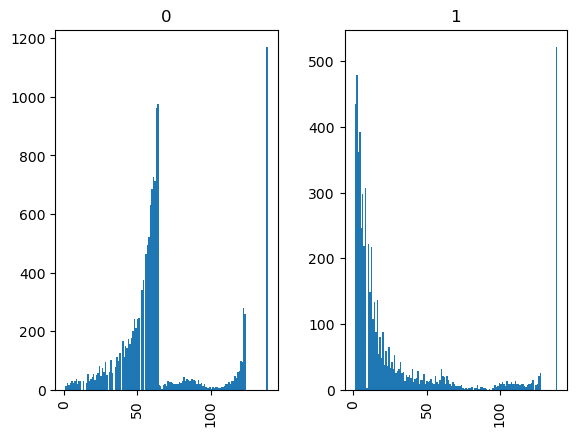

In [8]:
#(g) ( non so quale vada bene)
df.hist(column='TDC_CHANNEL', by='FPGA', bins = df['TDC_CHANNEL'].max())

C:\Users\eugen\AppData\Local\Temp\ipykernel_23512\3693173034.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\eugen\AppData\Local\Temp\ipykernel_23512\3693173034.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


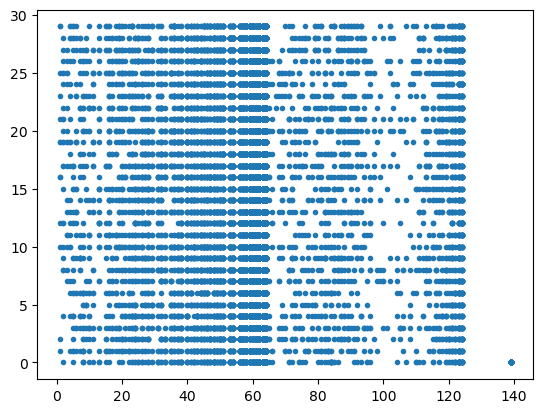

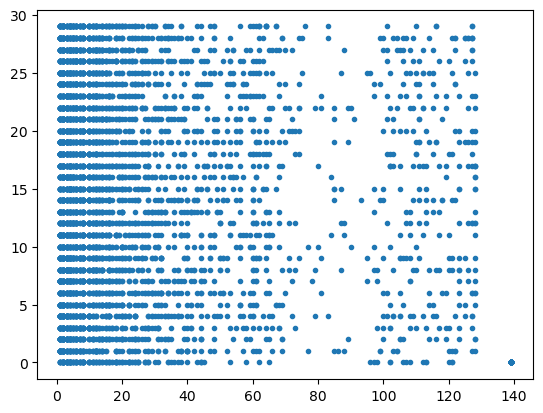

In [9]:
# 7   NO
import matplotlib
import matplotlib.pyplot as plt
#0 refers to FPGA 0
#1 refers to FPGA 1
df0 = df[df["FPGA"]==0]#we consider only that dataframe where the FPGA number is 0
x0 = df0["TDC_CHANNEL"] #TDC channel for fpga 0 
y0 = df0["TDC_MEAS"]

df1 = df[df["FPGA"]==1]
x1 = df1["TDC_CHANNEL"] #TDC channel for fpga 1
y1 = df1["TDC_MEAS"]

f = plt.figure()
plt.plot(x0,y0,".")
f.show()

g = plt.figure()
plt.plot(x1,y1,'.')
g.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [10]:
#( g)
channel_counts = df.groupby('TDC_CHANNEL').size().sort_values(ascending=False) # .size() ritorna il numero di righe per un determinato gruppo
print('Most noisy channels: \n', channel_counts[:3])



Most noisy channels: 
 TDC_CHANNEL
139    1693
64      996
63      969
dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [11]:
# 9 ( g)
unique_orbits = df['ORBIT_CNT'].nunique()
print('Number of unique orbits:', unique_orbits)

unique_orbits_139 = df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()
print('Number of unique orbits with at least one measurment from TDC_CHANNEL=139:', unique_orbits)

Number of unique orbits: 200
Number of unique orbits with at least one measurment from TDC_CHANNEL=139: 200
